## Simple example of the 1-D Chirp-Z transform

The chirp-z transform lets us sample the DTFT starting at an aribtrary point on a finely-spaced grid, with ony slightly worse runtime than an FFT evalutaed at the same number of points, potentially a much faster runtime than a FFT padded sufficiently to achieve the same spectral resolution

In [1]:
%pylab inline
import numpy as np
import chirpz

Populating the interactive namespace from numpy and matplotlib


First we create a signal by smoothing some random noise and look at its DFT evaluated at 256 points, as computed by the FFT. Computing the N-point DFT of a N-point signal via the FFT has a complexity of $$O(N Log N)$$. 

(0, 40)

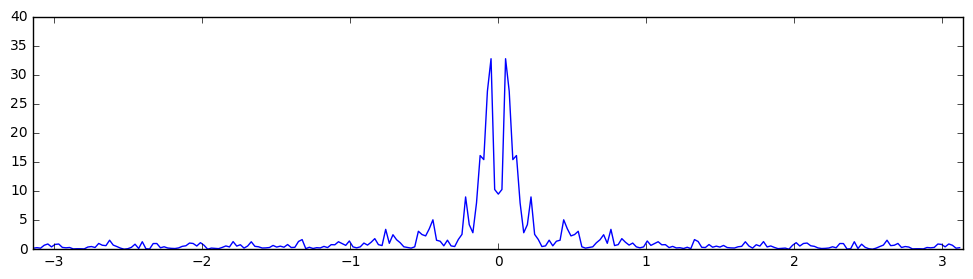

In [2]:
# a basic signal 
N = 256

np.random.seed(0)
x = np.convolve(np.random.normal(0, 1, N), np.ones(20)/20.0)[:N]
omegas = np.linspace(-np.pi, np.pi, N+1)[:N]
dft = np.fft.fftshift(np.fft.fft(x))
fig = pylab.figure(figsize=(12, 3))
ax = fig.add_subplot(1, 1, 1)

pylab.plot(omegas, abs(dft))
ax.set_xlim(-np.pi, np.pi)
ax.set_ylim(0, 40)


Then we explicitly evaluate the discrete-time Fourier transform (DTFT) of the signal $x[n]$. Remember that the DTFT of a discrete-time signal is a continuous function of omega. Naively evaluating the M-point DTFT of an N-point signal is $O(M\cdot N)$. Here we evaluate at M = 16x256 points, and zoom in on $[-\frac{\pi}{4}, \frac{\pi}{4} ]$

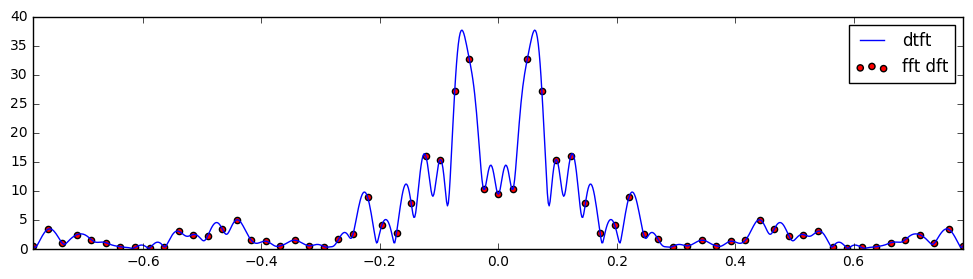

In [3]:
fig = pylab.figure(figsize=(12, 3))
ax = fig.add_subplot(1, 1, 1)
zoom_factor = 16
omegas_zoom = np.linspace(-np.pi, np.pi, zoom_factor*N+1)[:zoom_factor*N]


dtft = chirpz.pychirpz.dtft(x, omegas_zoom)
ax.plot(omegas_zoom, np.abs(dtft), label='dtft')
ax.scatter(omegas, np.abs(dft), c='r', label='fft dft')
ax.set_xlim(-np.pi/4, np.pi/4.0)
ax.set_ylim(0, 40)
pylab.legend()

Note from the above plot that there are various sampling artifacts. One way of resolving this is to oversample the DFT via zero-padding. This is what happens when you ask for an FFT evaluated at M points of an N-point signal. The results are below. This is a $O(M log M)$ operation

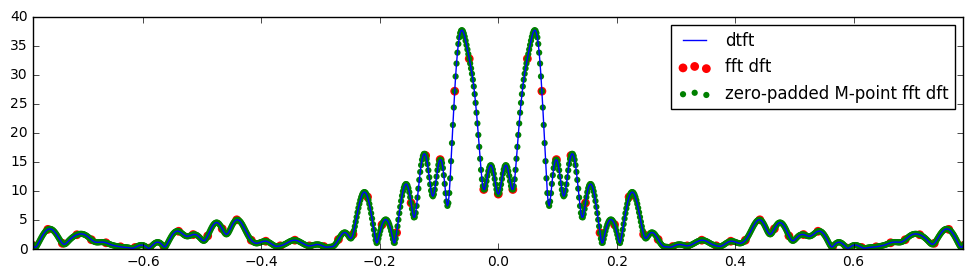

In [4]:

dtft_zoom = chirpz.pychirpz.dtft(x, omegas_zoom)
fft_zoom = np.fft.fftshift(np.fft.fft(x, N*zoom_factor))


fig = pylab.figure(figsize=(12, 3))
ax = fig.add_subplot(1, 1, 1)

ax.plot(omegas_zoom, np.abs(dtft_zoom), label='dtft')
ax.scatter(omegas, np.abs(dft), c='r', s=40, edgecolor='none', label='fft dft')
ax.scatter(omegas_zoom, np.abs(fft_zoom), c='g', edgecolor='none', label='zero-padded M-point fft dft')

ax.set_xlim(-np.pi/4, np.pi/4.0)
ax.set_ylim(0, 40)
pylab.legend()


But what if we just care about a subset of the DTFT? That is, what if we want to evaluate the DTFT on the region $[-\frac{\pi}{4}, \frac{\pi}{4} ]$ and ignore everything else? This is where the chirp-z transform comes it. We can specify that we only wish to evaluate the DTFT starting at a particular angular frequency, with a certain angular spacing, for a specific number of points. If we wish to evaluate the DTFT of a $N$-length signal at $M$ evenly-spaced points, it will take roughly $O((M+N) log (M+N))$. We can see the result below. 

In [5]:
# now try chirp-z transform
start = -np.pi / 4.0
omega_delta = omegas_zoom[1] - omegas_zoom[0]
M = N * zoom_factor / 4.0
zoom_cz = chirpz.pychirpz.zoom_fft(x, start, omega_delta , M)

/Users/jonas/anaconda/envs/test-environment/lib/python2.7/site-packages/chirpz/pychirpz.py:128: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return chirpz(x, M, A, W)


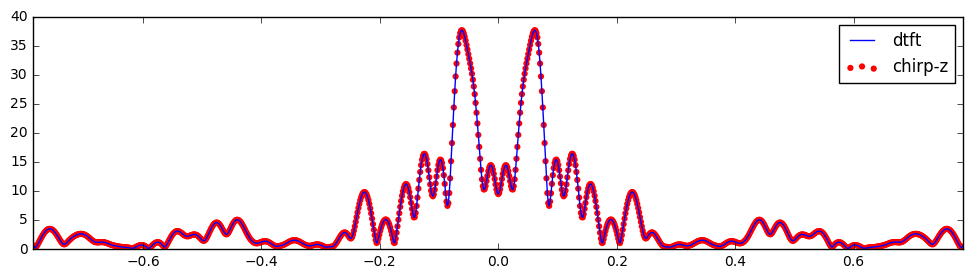

In [6]:

fig = pylab.figure(figsize=(12, 3))
ax = fig.add_subplot(1, 1, 1)
omegas_cz = np.arange(M) * omega_delta + start

ax.plot(omegas_zoom, np.abs(dtft_zoom), label='dtft')
ax.scatter(omegas_cz, np.abs(zoom_cz), c='r', s=20, edgecolor='none', label='chirp-z')
ax.set_xlim(-np.pi/4, np.pi/4.0)
ax.set_ylim(0, 40)
pylab.legend()

This can be a substantial savings if you are trying to evaluate a very zoomed-in region of the DTFT -- that is, if you would have had to significantly pad your FFT by a large factor to achieve a given frequency spacing